In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [43]:
 def graph_categorical(df, column_array):
    """
    Graphs the categorical columns of df specified in column_array.
    Plots the given categorical columns against the column in df labelled 'target'
    Prints those plots
    Returns nothing.
    Returns an error if 'target' is not a column in df, or if all columns are not categorical.
    """
    try:
        assert('target' in df.columns)
    except:
        print("'target' not found in df.columns")
        return None
        
    try: 
        for col in column_array:
            assert(df[col].dtype == 'O')
    except:
        print('numeric type column passed to graph_categorical')
        return None
        
    fig, axes = plt.subplots(math.ceil(len(cols)/2),2, figsize = (10,15), sharey = True)
    axes = axes.reshape(-1)
    print(axes)
    for i in range(len(cols)):
        ax = axes[i]
        df_grouped = pd.DataFrame(df.groupby(cols[i])['target'].value_counts(normalize=True)).unstack()
        df_grouped.plot.bar(ax = ax)
        ax.get_legend().remove()
        ax.set_title(cols[i].title().replace('_'," "),fontdict = {'fontsize':15}, y = .9)
        ax.set_xlabel('')
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fontsize = 'small', fancybox = True)
    plt.tight_layout()
    plt.subplots_adjust(top = .95)
    plt.suptitle('Percentages of Categories in Each Target', fontsize = 15)

In [37]:
predictors = pd.read_csv('../data/training_set_values.csv')
targets = pd.read_csv('../data/training_set_labels.csv')
df = predictors.copy()
df['target'] = targets['status_group'].copy()
predictors.fillna('missing',inplace = True)

In [38]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [39]:
cols = ['basin','scheme_management','extraction_type_class','management_group',
       'payment_type','source_type']

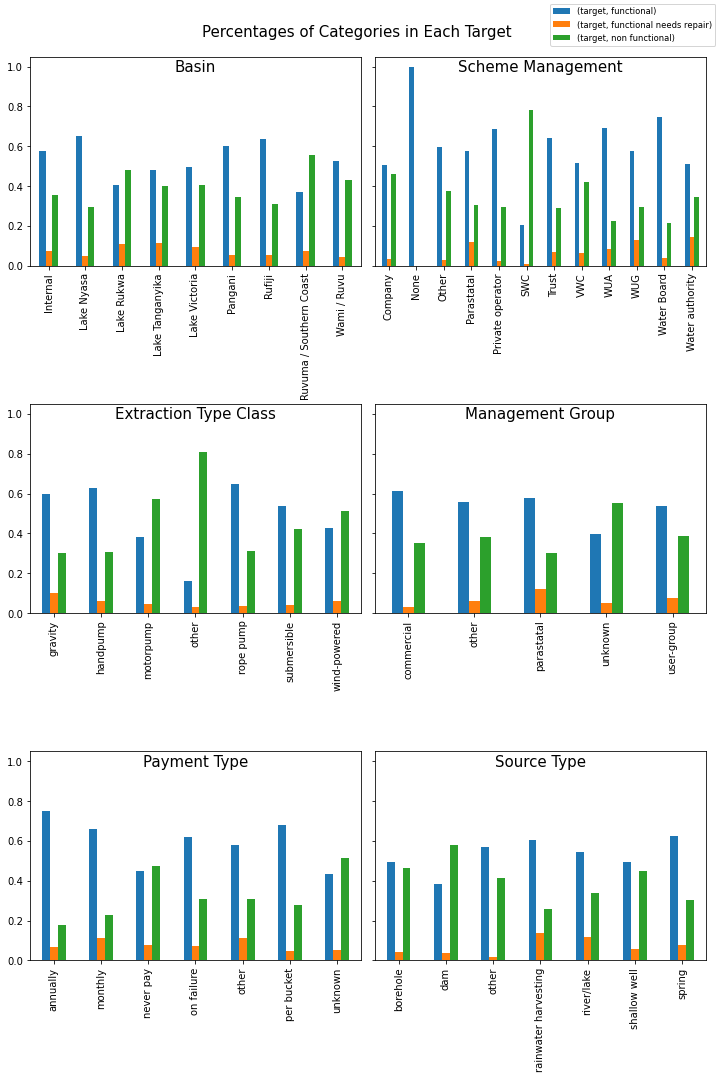

In [40]:
graph_categorical(df,cols)